<center>
<img src="https://tensorflowkorea.files.wordpress.com/2020/12/4.-e18492e185a9e186abe1848ce185a1-e18480e185a9e186bce18487e185aee18492e185a1e18482e185b3e186ab-e18486e185a5e18489e185b5e186abe18485e185a5e18482e185b5e186bce18483e185b5e186b8e18485e185a5e.png?w=972" width="250" height="250"><br>
</center>


 - (https://bit.ly/hg-03-1)
 - (https://bit.ly/hg-03-2)
 - (https://bit.ly/hg-03-3)






# K-최근접 이웃 회귀

- 핵심키워드
    - 회귀
    - k-최근접 이웃 회귀
    - 결정계수
    - 과대적합과 과소적합
    
지도 학습의 한 종류인 회귀 문제를 이해하고 k-최근접 이웃 알고리즘을 사용해 농어의 무게를 예측하는 회귀 문제를 풀어 보자.

### k-최근접 이웃 회귀

지도 학습 알고리즘은 크게 분류와 회귀(regression)으로 나뉜다. 분류는 2장에서 다루었다. 말 그대로 샘플을 몇 개의 클래스 중 하나로 분류하는 문제이다. 회귀는 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제이다. 예를 들면 내년도 경제 성장률을 예측하거나 배달이 도착할 시간을 예측하는 것이 회귀 문제이다. 또 여기에서 주어진 문제처럼 농어의 무게를 예측하는 것도 회귀가 된다. 회귀는 정해진 클래스가 없고 임의의 수치를 출력한다.

k-최근접 이웃 분류 알고리즘은 분류와 회귀에 둘다 적용된다. 이 알고리즘은 간단하다. 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다. 그 다음 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측한다. 다음 그림의 왼쪽에 k-최근접 이웃 분류가 잘 나타나 있다. k=3(샘플이 3개)이라 가정하면 사각형이 2개로 다수이기 때문에 새로운 샘플 x의 클래스는 사각형이 된다. k-최근접 이웃 회귀도 간단하다. 분류와 똑같이 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다. 하지만 회귀이기 때문에 이웃한 샘플의 타깃은 어떤 클래스가 아니라 임의의 수치이다. 이웃 샘플의 수치를 사용해 새로운 샘플 x의 타깃을 예측하는 간단한 방법은 뭐가 있을까? 바로 이 수치들의 평균을 구하면 된다. 그림에서 이웃한 샘플의 타깃값이 각각 100, 80, 60이고 이를 평균 하면 샘플 x의 예측 타깃값은 80이 된다. k-최근접 이웃 분류 알고리즘과 비슷하고, 타깃값을 결정할 때만 조금 다르다. 그럼 농어 데이터를 준비하고 사이킷런을 사용해 회귀 모델을 훈련하자.

### 데이터 준비

문저 훈련 데이터를 준비하자. 농어의 길이만 있어도 무게를 잘 예측할 수 있다고 생각했다. 그럼 농어의 길이가 특성이고 무게가 타깃이 된다. 2장 1절에서 파이썬 리스트에서 넘파이 배열로 변환했지만 여기서는 바로 넘파이 배열에서 만들겠다.


- http://bit.ly/perch_data 에서 데이터를 복사해서 쓰세요.



In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

먼저 이 데이터가 어떤 형태를 띠고 있는지 산점도를 그려보겠다. 하나의 특성을 사용하기 때문에 특성 데이터를 x축에 놓고 타깃 데이러를 y축에 놓는다. 맷플롯립을 임포트하고 scatter() 함수를 사용하여 산점도를 그리자.

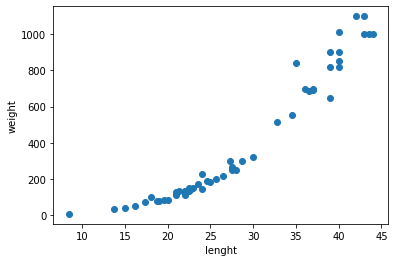

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

농어의 길이가 커짐에 따라 무게도 늘어남을 확인한다. 그래프를 그려보지 않아도 당연한 현상이다. 2장에서 했듯이 농어 데이터를 머신러닝 모델에 사용하기 전에 훈련 세트와 테스트 세트로 나누겠다.

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

사이킷런의 train_test_split()함수를 사용해 훈련 세트와 테스트 세트로 나눈다. 책과 결과를 동일하게 유지하기 위해 random_state=42로 지정했다. 사이킷런에 사용할 훈련 세트는 2차원 배열이어야 한다는 점을 기억하자. perch_length가 1차원 배열이기 때문에 이를 나눈 train_input과 test_input도 1차원 배열이다. 이런 1차원 배열을 1개의 열이 있는 2차원 배열로 바꿔야 한다. 파이썬에서 1차원 배열의 크기는 원소가 1개인 튜플로 나타낸다. 예를 들어 [1,2,3]의 크기는 (3, )이다. 이를 2차원 배열로 만들기 위해 억지로 하나의 열을 추가했다. 이렇게 하면 배열의 크기가 (3,1)이 된다. 배열을 나타내는 방식만 달라졌을 뿐 배열에 있는 원소의 개수는 동일하게 3개이다. 배열을 나타내는 방식만 달라졌을 뿐 배열에 있는 원소의 개수는 동일하게 3개이다.

2장에서 2개의 특성을 사용했기 때문에 자연스럽게 열이 2개인 2차원 배열을 사용했다. 이번 예제에서는 특성을 1개만 사용하므로 수동으로 2차원 배열을 만들어야 한다. 복잡하게 느껴지지만, 다행히 넘파이 배열은 크기를 바꿀 수 있는 reshape()메서드를 제공한다. 예를 들어 (4, )배열을
(2,2)크기로 바꿔보자.

In [4]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


test_array는 (4, )배열인 것을 확인 했으니 이제 (2,2) 크기로 바꿔 보겠다.

In [5]:
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


이처럼 reshape()메서드에는 바꾸려는 배열의 크기를 지정할 수 있다.

reshape() 메서드를 사용하는 방법은 어렵지 않다. 이제 이 메서드를 사용해 train_input과 test_input을 2차원 배열로 바꾸겠다. train_input의 크기는 (42, )이다. 이를 2차원 배열인 (42, 1)로 바꾸려면 train_input.reshape(42,1)과 같이 사용한다. 넘파이는 배열의 크기를 자동으로 지정하는 기능도 제공한다. 크기에 -1을 지정하면 나머지 원소 개수로 모두 채우라는 의미이다. 예를 들어 첫 번째 크기를 나머지 원소 개수로 채우고, 두 번째 크기를 1로 하려면 train_input.reshape(-1,1)처럼 사용한다. 그럼 reshape()메서드로 배열의 크기를 변경하겠다.

In [6]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


2차원 배열로 성공적으로 변환했다. reshape(-1, 1)과 같이 사용하면 배열의 전체 원소 개수를 매번 외우지 않아도 되므로 편리하다. 이제 준비한 훈련 세트를 활용하여 k-최근접 이웃 알고리즘을 훈련시켜 보자.

### 결정계수(R²)  

사이킷런에서 k-최근접 이웃 회귀 알고리즘을 구현한 클래스는 KNeighborsRegressor 이다. 이 클래스의 사용법은 KNeighborsClassifier와 매우 비슷하다. 객체를 생성하고 fit() 메서드로 회귀 모델을 훈련하겠다.

In [7]:
from sklearn.neighbors import KNeighborsRegressor

knr =KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련한다.

knr.fit(train_input, train_target)

KNeighborsRegressor()

이제 테스트 세트의 점수를 확인해 보자.

In [8]:
print(knr.score(test_input, test_target))

0.992809406101064


오 아주 좋은 점수이다. 그런데 이 점수는 무엇일까? 분류의 경우는 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율이다. 정확도라고 불렀다. 간단히 말해 정답을 맞힌 개수의 비율이다. 회귀에서 정확한 숫자를 맞힌다는 것은 거의 불가능하다. 예측하는 값이나 타깃 모두 임의의 수치이기 때문이다. 회귀의 경우에는 조금 다른 값으로 평가하는데 이 점수를 결정계수(coefficient of determination)라고 부른다. 또는 간단히 R²라고도 부른다. 이름이 조금 어렵지만 계산 방식은 간단하다. 이 값은 다음과 같은 식으로 계산 된다. 각 샘플의 타깃과 예측한 값의 차이를 제곱하여 더한다. 그 다음 타깃과 타깃 평균의 차이를 제곱하여 더한 값으로 나눈다. 만약 타깃의 평균 정도를 예측하는 수준이라면 (즉 분자와 분모가 비슷해져) R²는 0에 가까워지고, 예측이 타깃에 아주 가까워지면 (분자가 0에 가까워 지기 때문에) 1에 가까운 값이 된다.

- score()메서드의 출력값의 의미 : 사이킷런의 score()메서드가 출력하는 값은 높을 수록 좋은 것이다. 예를 들어 정확도나 결정계수가 그렇다.만약 score()메서드가 에러율을 반환한다면 이를 음스로 만들어 실제로 낮은 에러가 score()메서드로 반환될 때는 높은 값이 되도록 바꾼다.

0.99면 아주 좋은 값이다. 하지만 정확도처럼 R²가 직감적으로 얼마나 좋은지 이해하기는 어렵다. 대신 다른 값을 계산해 보자. 타깃과 예측한 값 사이의 차이를 구해 보면 어느 정도 예측이 벗어났는지 가늠하기 좋다. 사이킷런은 sklearn.metrics 패키지 아래 여러 가지 측정 도구를 제공한다. 이 중에서 mean_absolute_error는 타깃과 예측의 절댓값 오차를 평균하여 반환 한다.

In [9]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만든다.
test_prediction = knr.predict(test_input)

# 텟스트 세트에 대한 평균 절댓값 오차를 계산한다.
mae = mean_absolute_error(test_target, test_prediction)

print(mae)

19.157142857142862


결과에서 예측이 평균적으로 19g 정도 타깃값과 다르다는 것을 알 수 있다. 지금까지는 훈련 세트를 사용해 모델을 훈련하고 테스트 세트로 모델을 평가했다. 그런데 훈련 세트를 사용해 평가해 보면 어떨까? 즉 score() 메서드에 훈련 세트를 전달하여 점수를 출력해 보는 것이다. 이 값은 테스트 세트의 점수와 다를 것이다. 여기에서 우리가 배울 수 있는 것이 있을지도 모르겠다.

### 과대접합 vs 과소접합

앞에서 훈련한 모델을 사용해 훈련 세트와 R²점수를 확인하겠다.

In [10]:
print(knr.score(train_input, train_target))

0.9698823289099254


앞에서 테스트 세트를 사용한 점수와 비교해 보자. 어떤 값이 더 높은가? 이상한 점을 찾았나? 왜그럴까? 

모델을 훈련 세트에 훈련하면 훈련 세트에 맞 맞는 모델이 만들어진다. 이 모델을 훈련 세트와 테스트 세트에서 평가하면 두 값중 어느 것이 높을까? 보통 훈련 세트의 점수가 조금 더 높게 나온다. 왜냐하면 훈련 세트에서 모델을 훈련했으므로 훈련 세트에서 더 좋은 점수가 나온다.

만약 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘다면 모델이 훈련 세트에 과대적합overfitting 되었다고 말한다. 즉 훈련 세트에만 잘 맞는 모델이라 테스트 세트와 나중에 실전에 투입하여 새로운 샘플에 대한 예측을 만들 때 잘 동작하지 않을 것이다. 훈련 세트에만 잘 맞는 모델을 원하지는 않는다.

반대로 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우는 어떨까? 이런 경우를 모델이 훈련 세트에 과소적합underfitting 되었다고 말한다. 즉 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우이다. 훈련 세트가 전체 데이터를 대표한다고 가정하기 때문에 훈련 세트를 잘 학습하는 것이 중요하다.

앞서 k-최근접 이웃 회귀로 평가한 훈련 세트와 테스트 세트의 점수는 어떤가? 훈련세트보다 테스트 세트의 점수가 높으니 과소적합니다. 이문제를 어떻게 해결해야할까? 모델을 조금 더 복잡하게 만들면 된다. 즉 훈련 세트에 더 잘 맞게 만들면 테스트 세트의 점수는 조금 낮아질 것이다. k-최근접 이웃 알고리즘으로 모델을 더 복잡하게 만드는 방법은 이웃의 개수 k를 줄이는 것이다. 이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해지고, 이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따를 것이다. 여기에서 사이킷런의 k-최근접 이웃 알고리즘의 기본 k 값은 5이다. 이를 3으로 낮추어 보자.

이전 장에서 설명한 것처럼 사이킷러의 k-최근접 이웃 클래스는 이웃의 개수를 바꾸기 위해 클래스 객체를 다시 만들 필요가 없다. 그냥 n_neighbors 속성값을 바꾸면 된다.

In [11]:
# 이웃의 개수를 3으로 설정한다.
knr.n_neighbors = 3

# 모델을 다시 훈련한다.
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


k 값을 줄였더니 훈련 세트의 R² 점수가 높아졌다 그럼 이제 테스트 세트의 점수를 확인해 보자.

In [12]:
print(knr.score(test_input, test_target))

0.9746459963987609


예상대로 테스트 세트의 점수는 훈련 세트보다 낮아졌으므로 과속적합 문제를 해결한 것 같다. 또한 두 점수의 차이가 크지 않으므로 이 모델이 과대적합 된 것 같지도 않다. 이 모델이 테스트 세트와 추가될 농어 데이터에도 일반화를 잘하리라 예상할 수 있다. 좋다. 성공적으로 회귀 모델을 훈련 했다.

### 회귀 문제 다루기 - 문제해결 과정

농어의 높이,길이 등의 수치로 무게를 예측해 달라는 요청을 했다. 이 문제는 분류가 아니라 회귀 문제이다. 회귀는 임의의 수치를 예측하는 문제이다. 농어의 길이를 사용해 무게를 예측하는 k-최근접 이웃 회귀 모델을 만들었다.

k-최근접 이웃 회귀 모델은 분류와 동일하게 가장 먼저 가까운 k개의 이웃을 찾는다. 그 다음 이웃 샘플의 타깃값을 평균하여 이 샘플의 예측값으로 사용한다.

사이킷런은 회귀 모델의 점수로 R², 즉 결정계수 값을 반환한다. 이 값은 1에 가까울수록 좋다. 정량적인 평가를 하고 싶다면 사이킷헌에서 제공하는 다른 평가 도구를 사용할 수 있다. 대표적으로 절댓값 오차가 있다.

모델을 훈련하고 나서 훈련세트와 테스트 세트에 대해 모두 평가 점수를 구할 수 있다. 훈련 세트의 점수와 테스트 세트의 점수 차이가 크면 좋지 않다. 일반적으로 훈련 세트의 점수가 테스트 세트보다 조금더 높다. 만약 테스트 세트의 점수가 너무 낮다면 모델이 훈련 세트에 과도하게 맞춰진 것이다. 이를 과대적합이라고 한다. 반대로 테스트 세트 점수가 너무 높거나 두 점수가 모두 낮으면 과소 적합니다.

과대적합일 경우 모델을 덜 복잡하게 만들어야한다. k-최근접 이웃의 경우 k값을 늘린다. 과소적합일 경우 모델을 더 복잡하게 만들어야한다. k-최근접 이웃의 경우 k값을 줄인다.

> 전체 소스 코드  -https://bit.ly/hg-03-1

In [13]:
# k-최근접 이웃 회귀

# 데이터 준비
import numpy as np

import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

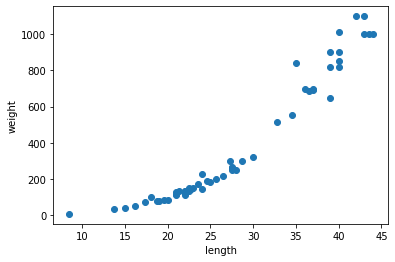

In [14]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 길이에 따른 무게 증가 확인

In [15]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [16]:
print(train_input.shape)

(42,)


In [17]:
print(test_input.shape)

(14,)


In [18]:
print(test_input)

[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]


In [19]:
#머신러닝을 사용하기 위해 2차원 배열로 만든다. reshape() 함수 사용
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [20]:
# 결정계수 

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련한다.

knr.fit(train_input, train_target)

KNeighborsRegressor()

In [21]:
print(knr.score(test_input, test_target))

0.992809406101064


In [22]:
from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측을 만든다
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절댓값 오차를 계산한다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


- 결과에서 예측이 평균적으로 19g정도 타깃값과 다르다는 것을 알 수 있다.

In [23]:
# 과대적합 vs 과소적합
# 훈련세트 점수확인
print(knr.score(train_input, train_target))

0.9698823289099254


In [24]:
# 이웃의 갯수를 3으로 설정합니다
knr.n_neighbors = 3
# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [25]:
print(knr.score(test_input, test_target))

0.9746459963987609


### 03-2 선형 회귀

- 핵심키워드
    - 선형회귀
    - 계수 또는 가중치
    - 모델 파라미터
    - 다항 회귀
    - k-최근접 이웃 회귀와 선형 회귀 알고리즘의 차이를 이해하고 사이킷런을 사용해 여러 가지 선형 회귀 모델을 만들어 보자.
    
#### k-최근접 이웃의 한계

무려 길이가 50cm인 농어의 무게를 예측해달라고해서, 예측했더니 실제 무게와 너무 차이가 났다. 뭔가 또 잘못되었다. 먼저 1절에서 사용한 데이터와 모델을 준비해보자.
- http://bit.ly/perch_data

In [26]:
import numpy as np

In [27]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

이번에도 데이터를 훈련세트와 테스트 세트로 나눈다. 특성 데이터는 2차원 배열로 변환한다.

In [28]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눈다.
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꾼다.
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

최근접 이웃 개수를 3으로 하는 모델을 훈련한다. 여기까지는 1절에서 했던 내용 그대로 이다.

In [29]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델을 훈련한다.
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

이제 이 모델을 사용해 길이가 50cm인 농어의 무게를 예측해보자.

In [30]:
print(knr.predict([[50]]))

[1033.33333333]


이 모델은 50cm 농어의 무게를 1,033g 정도로 예측했다. 그런데 실제 이 농어의 무게는 훨씬 더 많이 나간다고 한다. 어디가 문제일까? 훈련 세트와 50cm농어 그리고 이 농어의 최근접 이웃을 산점도에 표시하겠다. 2장에서 보았듯이 사이킷런의 k-최근접 이웃 모델의 kneighbors() 메서드를 사용하면 가장 가까운 이웃까지의 거리와 이웃 샘플의 인덱스를 얻을 수 있다.

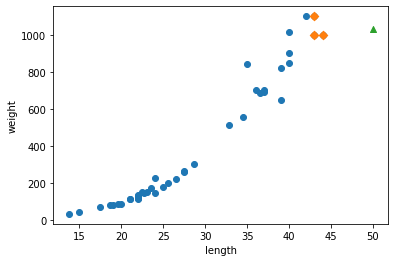

In [31]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구한다.
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그린다.

plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터

plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

길이가 50cm이고 무게가 1033g인 농어는 초록색 삼각형 으로 표시되고 그 주변의 샘플은 다이아몬드 주황색이다. 그림을 그려보니 문제가 잘 드러난다. 이 산점도를 보면 길이가 커질수록 농어의 무게가 증가하는 경향이 있다. 어찌 보면 너무나 당연하다. 하지만 50cm 농어에서 가장 가까운 것은 45cm 근방이기 때문에 k-최근접 이웃 알고리즘은 이 샘플들의 무게를 평균한다. 이웃 샘플의 타깃의 평균을 구해보자.

In [32]:
print(np.mean(train_target[indexes]))

1033.3333333333333


모델이 예측했던 값과 정확히 일치한다. k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균한다. 따라서 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측할 수 있다. 예를 들어 길이가 100cm인 농어도 여전히 1,033g으로 예측한다.

한 번 더 그래프를 그려 확인해 보자.

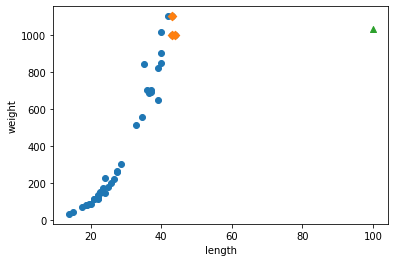

In [33]:
# 100cm 농어의 이웃을 구한다.
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그리자.
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그리자.

plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터

plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이런 식이면 농어가 아무리 커도 무게가 더 늘어나지 않겠다. k-최근접 이웃을 사용해 이 문제를 해결하려면 가장 큰 농어가 포하되도록 훈련 세트를 다시 만들어야한다. 
- 머신러닝 모델은 주기적으로 훈련해야 한다. 사실 머신러닝 모델은 한 번 만들고 끝나는 프로그램이 아니다. 시간과 환경이 변화하면서 데이터도 바뀌기 때문에 주기적으로 새로운 훈련 데이터로 모델을 다시 훈련해야한다. 예를 들어 배달 음식이 도착하는 시간을 예측하는 모델은 배달원이 바뀌거나 도로 환경이 변할 수 있기 때문에 새로운 데이터를 사용해 반복적으로 훈련해야 한다.

#### 선형 회귀

선형 회귀 linear regression는 널리 사용되는 대표적인 회귀 알고리즘이다. 비교적 간단하고 성능이 뛰어나기 때문에 맨 처음 배우는 머신러닝 알고리즘 중 하나이다. 선형이란 말에서 직잠할 수 있듯이 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘이다. 어떤 직선을 학습할까? 당연히 그 특성을 가장 잘 나타낼 수 있는 직선을 찾아야 한다. 다음 중 어떤 직선이 농어 데이터를 가장 잘 표현하는지 한 번 생각해 보자.


사이킷런은 sklearn.linear_model 패키지 아래에 LinearRegression 클래스로 선형 회귀 알고리즘을 구현해 놓았다. 이 클래스의 객체를 만들어 훈련하겠다. 앞으로 계속 보게 되겠지만 사이킷런의 모델 클래스들은 훈련, 평가, 예측하는 메서드 이름이 모두 동일하다. 즉 LinearRegression 클래스에도 fit(), score(), predict() 메서드가 있다.

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#선형 회귀 모델을 훈련한다.
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측하자
print(lr.predict([[50]]))

[1241.83860323]


y = ax+ b   하나의 직선을 그리려면 기울기와 절편이 있어야한다. LinearRegression 클래스가 찾은 a와 b는 lr 객체의 coef_ 와 intercept_ 속성에 저장되어 있다.

In [35]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


- coef_ 속성 이름에서 알 수 있듯이 머신러닝에서 기울기를 종종 계수(coefficient) 또는 가중치(weight)라고 부른다.
- coeg_ 와 intercept_ 를 머신러닝 알고리즘이 찾은 값이라는 의미로 **모델 파라미터(model parameter)**라고 부른다. 이 책에서 사용하는 많은 머신러닝 알고리즘의 훈련 과정은 최적은 모델 파라미터를 찾는 것과 같다. 이를 **모델기반학습**이라고 부른다. 앞서 사용한 k-최근접 이웃에는 모델 파라미터가 없다. 훈련 세트를 저장하는 것이 훈련의 전부였다. 이를 **사례기반학습** 이라고 부른다.

농어의 길이 15에서 50까지 직선으로 그려보자. 이 직선을 그리려면 앞에서 구한 기울기와 졀편을 사용하여 (15, 15 x 39-709)와 (50, 50 x 39 -709) 두점을 이으면 된다. 훈련 세트의 산점도와 함께 그려보자.

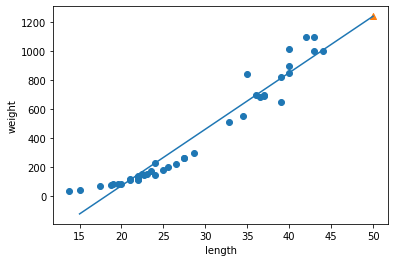

In [37]:
# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input, train_target)

# 15에서 50까지 1차방정식 그래프를 그린다.
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

바로 이 직선이 선형 회귀 알고리즘이 이 데이터셋에서 찾은 최적의 직선이다. 길이가 50cm인 농어에 대한 예측은 이 직선의 연장선에 있다. 성공이다! 이제 훈련 세트 범위를 벗어난 농어의 무게도 예측할 수 있다. 그럼 이전 절과 같이 훈련 세트와 테스트 세트에 대한 R²점수를 확인해보자.

In [38]:
print(lr.score(train_input, train_target)) # 훈련세트
print(lr.score(test_input, test_target)) # 테스트 세트

0.939846333997604
0.8247503123313558


훈련 세트와 테스트 세트의 점수가 조금 차이 난다. 이 모델이 훈련 세트에 과대적합되었다고 말할 수 있을까? 사실 훈련 세트의 점수도 높지 않다. 오히려 전체적으로 과소적합되었다고 볼 수 있다. 과소적합 말고도 다른 문제가 또 있다. 그래프 왼쪽 아래를 보자. 뭔가 이상하지 않나?

#### 다항 회귀

지금까지의 학습으로 어느 정도 눈썰미가 생겼다. 직감적으로 그래프에서 무언가 이상하다고 느꼈다. 선형 회귀가 만든 직선이 왼쪽 아래로 쭉 뻗어 있다. 이 직선대로 예측하면 농어의 무게가 0g 이하로 내려갈 텐데 현실에서는 있을 수 없는 일이다. 

농어의 길이와 무게에 대한 산점도를 자세히 보면 일직선이라기보다 왼쪽 위로 조금 구부러진 곡선에 가깝다. 그렇다면 최적의 직선을 찾기 보다 최적의 곡선을 찾으면 어떨까?


이런 2차 방정식의 그래프를 그리려면 길이를 제곱한 항이 훈련세트에 추가 되어야한다. 사실 넘파이를 사용하면 아주 간단히 만들 수 있다. 다음처럼 농어의 길이를 제곱해서 원래 데이터 앞에 붙여 보겠다. 2장에서 사용했던 column_stack() 함수를 사용하면 아주 간단하다. train_input을 제곱한 것과 train_input 두 배열을 나란히 붙이면 된다. test_input도 마찬가지 이다.

In [39]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

train_input ** 2 식에도 넘파이 브로드캐스팅이 적용된다. 즉 train_input에 있는 모든 원소를 제곱한다. 새롭게 만든 데이터셋의 크기를 확인해보자.

In [41]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


원래 특성인 길이를 제곱하여 왼쪽 열에 추가했기 때문에 훈련 세트와 테스트 세트 모두 열이 2개로 늘어났다. 이제 train_poly를 사용해 선형 회귀 모델을 다시 훈련하자. 이 모델이 2차 방정식의 a,b,c를 잘 찾을 것으로 기대한다. 여기서 주목할 점은 2차 방정식 그래프를 찾기 위해 훈련 세트에 제곱 항을 추가했지만, 타깃값은 그대로 사용한다는 것이다. 목표하는 값은 어떤 그래프를 훈련하든지 바꿀 필요가 없다. 이 훈련 세트로 선형 회귀 모델을 훈련한 다음 50cm짜리 농어에 대해 무게를 예측해보자. 앞서 훈련 세트에서 했던 것처럼 테스트 할 때는 이 모델에 농어 길이의 제곱과 원래 길이를 함께 넣어 주어야 한다.

In [43]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50 ** 2, 50]]))

[1573.98423528]


1절에서 훈련한 모델보다 더 높은 값을 예측했다. 이 모델이 훈련한 계수와 졀편을 출력해 보자.

In [44]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


a = 1.01 ... b = -21.55... c = 116.050... 으로 나타난다.

이런 방정식을 다항식polynomial이라 부르며 다항식을 사용한 선형 회귀를 다항 회귀 polynomial regression라고 부른다. 그럼 이 2차 방정식의 계수와 절편 a,b,c를 알았으니 이전과 동일하게 훈련 세트의 산점도에 그래프로 그려보자. 짧은 직선을 이어서 그리면 마치 곡선처럼 표현할 수 있다. 여기에서는 1씩 짧게 끊어서 그려 보겠다.

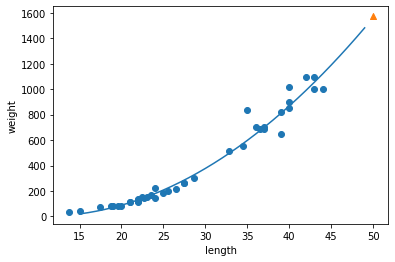

In [47]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만든다.
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그린다.

plt.scatter(train_input, train_target)

# 15에서 19까지 2차 방정식 그래프를 그린다.

plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

앞선 단순 선형 회귀 모델보다 훨씬 나은 그래프가 그려졌다. 훈련 세트의 경향을 잘 따르고 있고 무게가 음수로 나오는 일도 없을 것 같다. 그럼 훈련 세트와 테스트 세트 R²점수를 평가 하겠다.

In [48]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


훈련 세트와 테스트 세트에 대한 점수가 크게 높아졌습니다. 아주 좋네요. 하지만 여전히 테스트 세트의 점수가 조금 더 높습니다. 과소적합이 아직 남아 있는 것 같습니다. 그럼 조금 더 복잡한 모델이 필요할 것 같다. 아무래도 홍 선배에게 도움을 요청해야 할 것 같습니다.

#### 선형 회귀로 훈련 세트 범위 밖의 샘플 예측 - 문제해결 과정

k-최근접 이웃 회귀를 사용해서 농어의 무게를 예측했을 때 발생하는 큰 문제는 훈련 세트 범위 밖의 샘플을 예측할 수 없다는 점이다. k-최근접 이웃 회귀는 아무리 멀리 떨어져 있더라도 무조건 가까운 샘플의 타깃을 평균하여 예측한다. 이 문제를 해결하기 위해서 선형 회귀를 사용했다.선형 회귀는 훈련 세트에 잘 맞는 직선의 방정식을 찾는 것이다. 사이킷런의 LinearRegression 클래스를 사용하면 k-최근접 이웃 알고리즘을 사용했을 때와 동일한 방식으로 모델을 훈련하고 예측에 사용할 수 있다.


가장 잘 맞는 직선의 방정식을 찾는다는 것은 최적의 기울기와 절편을 구한다는 의미이다. 이 값들은 선형 회귀 모델의 coef_와 intercept_속성에 저장되어 있다. 선형 회귀 모델은 k-최근접 이웃 회귀와 다르게 훈련 세트를 벗어난 범위의 데이터도 잘 예측했다. 하지만 모델이 단순하여 농어의 무게가 음수일 수도 있다. 무게가 음수라니 있을 수 없는 일이다.


이를 해결하기 위해 다항 회귀를 사용했다. 간단히 농어의 길이를 제곱하여 훈련 세트에 추가한 다음 선형 회귀 모델을 다시 훈련했다. 이 모델은 2차 방정식의 그래프 형태를 학습하였고 훈련 세트가 분포된 형태를 잘 표현했다. 또 훈련 세트와 테스트 세트의 성능이 단순한 선형 회귀보다 훨씬 높아졌다. 하지만 훈련 세트 성능보다 테스트 세트 성능이 조금 높은 것으로 보아 과소적합된 경향이 아직 남아있다. 다음 절에서 조금 더 복잡한 모델을 만들어 이 문제를 해결해보자. 또한 너무 복잡한 모델일 경우, 즉 과대적합된 모델을 반대로 억제하는 방법도 알아보자.


>전체 소스 코드
- https://bit.ly/hg-03-2 에 접속하면 코랩에서 이 절의 코드를 바로 열어 볼 수 있다.


In [49]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [50]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [51]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [52]:
print(knr.predict([[50]]))

[1033.33333333]


In [53]:
import matplotlib.pyplot as plt

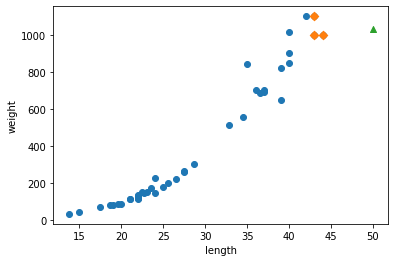

In [54]:
# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [55]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [56]:
print(knr.predict([[100]]))

[1033.33333333]


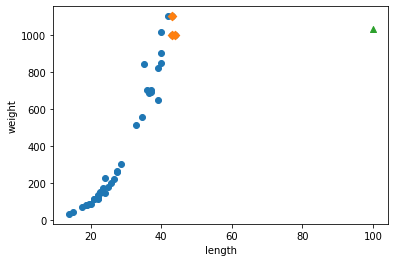

In [57]:
# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [60]:
## 선형 회귀
from sklearn.linear_model import LinearRegression

In [61]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [62]:
# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


In [63]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


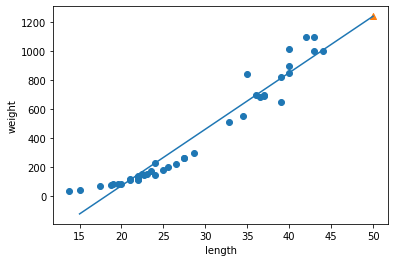

In [64]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [65]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [66]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [67]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [68]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [69]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


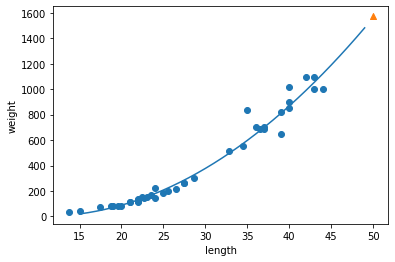

In [70]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [71]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


## 03-3 특성 공학과 규제

- 핵심키워드
    - 다중 회귀
    - 특성 공학
    - 릿지
    - 라쏘
    - 하이퍼파라미터
    - 여러 특성을 사용한 다중 회귀에 대해 배우고 사이킷러늬 여러 도구를 사용해 본다. 복잡한 모델의 과대적합을 막기 위한 릿지와 라쏘 회귀를 배운다.
    

### 다중 회귀

2절에서는 하나의 특성을 사용하여 선형 회귀 모델을 훈련 시켰다. 여러 개의 특성을 사용한 선형 회귀를 **다중 회귀 multiple regression**라고 부른다. 2절에서처럼 1개의 특성을 사용했을 때 선형 회귀 모델이 학습하는 것은 직선이다. 2개의 특성을 사용하면 무엇을 학습할까? 특성이 2개면 선형 회귀는 평면을 학습한다. 

이 예제에서는 농어의 길이뿐만 아니라 농어의 높이와 두께도 함께 사용한다. 또한 이전 절에서처럼 3개의 특성을 각각 제곱하여 추가한다. 거기다가 각 특성을 서로 곱해서 또 다른 특성을 만들겠다. 즉, '농어길이 x 농어 높이'를 새로우 특성으로 만드는 거다. 이렇게 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 **특성 공학feature engineering**이라고 부른다. 우리가 직접 특성을 제곱하고 특성끼리 곱해서 새로운 특성을 추가할 수도 있지만 사이킷런에서 제공하는 편리한 도구를 사용하겠다. 그럼 농어 데이터를 다시 불러오는 것부터 시작하자.


### 데이터 준비

이전과 달리 농어의 특성이 3개로 늘어났기 때문에 데이터를 복사해 붙여넣는 것도 번거롭다. 인터넷에서 데이터를 바로 다운로드하여 사용할 수는 없을까? 아쉽지만 넘파이는 이런 작업을 지원하지 않는다. 하지만 판다스를 사용하면 아주 간단하다.


**판다스pandas**는 유명한 데이터 분석 라이브러리이다. **데이터프레임dataframe**은 판다스의 핵심 데이터 구조이다. 넘파이 배열과 비슷하게 다차원 배열을 다룰 수 있지만 훨씬 더 많은 기능을 제공한다. 또 데이터프레임은 넘파이 배열로 쉽게 바꿀 수도 있다.


판다스를 사용해 농어 데이터를 인터넷에서 내려받아 데이터프레임에 저장하겠다. 그다음 넘파이 배열로 변환하여 선형 회귀 모델을 훈련해보자. 판다스 데이터프레임을 만들기 위해 많이 사용하는 CSV파일이다. CSV파일은 다음 그림처럼 콤마로 나누어져 있는 텍스트 파일이다.
 
전체 파일 내용을 보고 싶다면 웹 브라우저로 https://bit.ly/perch_csv_data 에 접속하자. 이 파일을 판다스에서 읽는 방법은 아주 간단하다. 판다스의 read_csv()함수에 주소를 넣어 주는 것이 전부이다. read_csv() 함수로 데이터프레임을 만든 다음 to_numpy()메서드를 사용해 넘파이 배열로 바꾼다.


코드로 구현하면 다음과 같다.

In [74]:
import pandas as pd  # pd는 관례적으로 사용하는 판다스의 별칭이다.
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

타깃 데이터는 이전과 동일한 방식으로 준비한다.
-  코드는 http://bit.ly/perch_data  에서 복사해서 쓰자.

In [75]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

그 다음 perch_full과 perch_weight를 훈련세트와 테스트 세트로 나눈다.

In [76]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

이 데이터를 사용해 새로운 특성을 만들어보자.

### 사이킷런의 변환기

사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공한다. 사이킷런에서는 이런 클래스를 **변환기transformer**라고 부른다. 사이킷런의 모델 클래스에 일관된 fit(),score(),predict() 메서드가 있는 것처럼 변환기 클래스는 모두 fit(), transform() 메서드를 제공한다.
앞서 배운 LinearRegression 같은 사이킷런의 모델 클래스는 추정기(estimator)라고 부른다. 우리가 사용할 변환기는 PolynomailFeature 클래스이다. 먼저 이 클래스를 사용하는 방법을 알아보자. 이 클래스는 sklearn.preprocessing  패키지에 포함되어 있다.

In [78]:
from sklearn.preprocessing import PolynomialFeatures

2개의 특성 2와 3으로 이루어진 샘플 하나를 적용해 보자. 앞서 이야기한 것처럼 이 클래스의 객체를 만든 다음 fit(),transform() 메서드를 차례대로 호출한다.

In [79]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


- transform 전에 꼭 poly.fit을 사용해야 하나요?
    - 훈련(fit)을 해야 변환(transform)이 가능하다. 사이킷런의 일관된 api 때문에 두 단계로 나뉘어져 있다. 두 메서드를 하나로 붙인 fit_transform 메서드도 있다.

fit()메서드는 새롭게 만들 특성 조합을 찾고 transform() 메서드는 실제로 데이터를 변환한다. fit() 메서드 호출을 눈여겨보자. 변환기는 입력 데이터를 변환하는 데 타깃 데이터가 필요하지 않는다. 따라서 모델 클래스와는 다르게 fit() 메서드에 입력 데이터만 전달했다. 즉 여기에서는 2개의 특성(원소)을 가진 샘플 [2,3]이 6개의 특성을 가진 샘플 [1.2.3.4.6.9.]로 바뀌었다. 와우, 특성이 아주 많아졌다! PolynomialFeatures 클래스는 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가한다. 2와 3을 각기 제곱한 4와 9가 추가되었고, 2와 3을 곱한 6이 추가되었다. 1은 왜 추가되었을까? 사실 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있다. 이렇게 놓고 보면 특성은 (길이, 높이, 두께, 1)이 된다. 하지만 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 굳이 이렇게 특성을 만들 필요가 없다. include_bias = False로 지정하여 다시 특성을 변환하겠다.

In [80]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


절편을 위한 항이 제거되고 특성의 제곱과 특성끼리 곱한 항만 추가되었다.
- include_bias = False는 꼭 지정해야하나?
    - include_bias = False로 지정하지 않아도 사이킷런 모델은 자동으로 특성에 추가된 절편 항을 무시한다 하지만 여기에서는 혼돈을 피하기 위해 명시적으로 지정했다.

이제 이 방식으로 train_input에 적용해 보자. train_input을 변환한 데이터를 train_poly에 저장하고 이 배열의 크기를 확인해 보자.

In [81]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


PolynomialFeatures 클래스는 9개의 특성이 어떻게 만들어졌는지 확인하는 아주 좋은 방법을 제공한다. 다음처럼 get_feature_name()메서드를 호출하면 9개의 특성이 각각 어떤 입력의 조합으로 만들어졌는지 알려준다.

In [83]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

'x0'은 첫번째 특성을 의미하고 'x0^2'는 첫 번째 특성의 제곱, 'x0x1'은 첫 번째 특성과 두 번째 특성의 곱을 나타내는 식이다. 이제 테스트 세트를 변환해 보겠다.

In [84]:
test_poly = poly.transform(test_input)

이어서 변환된 특성을 사용하여 다중 회귀 모델을 훈련하겠다.

- 꼭 훈련 세트에 적용했던 변환기로 테스트 세트를 변환해야 하나요?
    - 사실 PolynomialFeatures 클래스는 fit() 메서드에서 만들 특성의 조합을 준비하기만 하고 별도의 통계 값을 구하지 않는다. 따라서 테스트 세트를 따로 변환해도 된다. 하지만 앞에서 설명했듯이 항상 룬련 세트를 기준으로 테스트 세트를 변환하는 습관을 들이는 것이 좋다
    
    
### 다중 회귀 모델 훈련하기

다시 한번 이야기하지만 다중 회귀 모델을 훈련하는 것은 선형 회귀 모델을 훈련하는 것과 같다. 다만 여러 개의 특성을 사용하여 선형 회귀를 수행하는 것 뿐이다. 먼저 사이킷런의 LinearRegression 클래스를 임포트하고 앞에서 만든 train_poly 를 사용해 모델을 훈련시켜 보겠다.

In [86]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


와우! 아주 높은 점수가 나왔다. 농어의 길이뿐만 아니라 높이와 두께를 모두 사용했고 각 특성을 제곱하거나 서로 곱해서 다항 특성을 더 추가했다. 특성이 늘어나면 선형 회귀의 능력은 매우 강하다는 것을 알 수 있다.
- 테스트 세트에 대한 점수도 확인해보자

In [87]:
print(lr.score(test_poly, test_target))

0.9714559911594132


테스트 세트에 대한 점수는 높아지지 않았지만 농어의 길이만 사용했을 때 있던 과소적합 문제는 더이상 나타나지 않았다. 


특성을 더 많이 추가하면 어떨까? 3제곱, 4제곱 항을 넣는 거다. PolynomalialFeatures 클래스의 degree 매개변수를 사용하여 필요한 고차항의 최대 차수를 지정할 수 있다. 5제곱까지 특성을 만들어 출력해 보자.

In [92]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


만들어진 특성의 개수가 무려 55개나 된다. train_poly 배열의 열의 개수가 특성의 개수이다. 이 데이터를 사용해 선형 회귀 모델을 다시 훈련해 보자.

In [93]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991096


오, 거의 완벽한 점수이다. 테스트 세트에 대하 점수는 어떨까?

In [94]:
print(lr.score(test_poly, test_target))

-144.40579242335605


아니, 음수가 나왔다. 그것도 아주 큰 음수이다. 이게 무슨 일 일까?


특성의 개수를 크게 늘리면 선형 모델은 아주 강력해진다. 훈련 세트에 대해 거의 완벽하게 학습할수있다. 하지만 이런 모델은 훈련 세트에 너무 과대적합되므로 테스트 세트에서는 형편없는 점수를 만든다.

- 샘플 개수보다 특성이 많다면 어떨까?

 여기에서 사용한 훈련 세트의 샘플 개수는 42개 밖에 되지 않는다. 42개의 샘플을 55개의 특성으로 훈련하면 완벽하게 학습할 수 있는 것이 당연하다. 예를 들어 42개의 참새를 맞추기 위해 딱 한 번 새총을 쏴야 한다면 참새 떼 중앙을 겨냥하여 가능한 한 맞출 가능성을 높여야 한다. 하지만 55번이나 쏠 수 있다면 한 번에 하나씩 모든 참새를 맞출 수 있다.
 
 이 문제를 해결 하려면 다시 특성을 줄여야 겠다. 하지만 이런 상황은 과대적합을 줄이는 또 다른 방법을 배워 볼 좋은 기회이다. 바로알아보자.

### 규제

**규제regularization**는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것을 말한다. 즉 모델이 훈련 세트에 과대적합되지 않도록 만드는 것이다. 선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일이다.

앞서 55개의 특성으로 훈련한 선형 회귀 모델의 계수를 규제하여 훈련 세트의 점수를 낮추고 대신 테스트 세트의 점수를 높여 보겠다. 

그 전에 특성의 스케일에 대해 잠시 생각해보자. 2장에서 보았듯이 특성의 스케일이 정규화되지 않으면 여기에 곱해지는 계수 값도 차이 나게 된다. 일반적으로 선형 회귀 모델에 규제를 적용할때 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 않을 것이다. 그렇다면 규제를 적용하기 전에 먼저 정규화를 해야겠다. 2장에서는 평균과 표준편차를 직접 구해 특성을 표준점수로 바꾸었다. 이 방법도 쉽지만, 이번에는 사이킷런에서 제공하는 StandardScaler 클래스를 사용하겠다. 이 클래스도 변환기의 하나이다.

In [96]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

먼저 StandardScaler 클래스의 객체 ss를 초기화한 후 PolynomialFeatures 클래스로 만든 train_poly를 사용해 이 객체를 훈련한다. 여기에서도 다시 한번 강조하지만 꼭 훈련 세트로 학습한 변환기를 사용해 테스트 세트까지 변환해야 한다.

이제 표준점수로 변환한 train_scaled와 test_scaled가 준비되었다.

- 훈련 세트에서 학습한 평균과 표준편차는 StrandardScaler 클래스 객체의 mean_,scale_속성에 저장된다. 특성마다 계산하므로 55개의 평균과 표준편차가 들어있다.


선형 회귀 모델에 규제를 추가한 모델을 **릿지ridge**와 **라쏘lasso**라고 부른다. 두 모델은 규제를 가하는 방법이 다르다. 릿지는 계수를 제곱한 값을 기준으로 규제를 적용하고, 라쏘는 계수의 절댓값을 기준으로 규제를 적용한다. 일반적으로 릿지를 조금 더 선호 한다. 두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수도 있다. 물론 사이킷런이 이 두 알고리즘을 모두 제공한다.


### 릿지 회귀

릿지와 라쏘 모두 sklearn.linear_model 패키지 안에 있다. 사이킷런 모델을 사용할 때 편리한 점은 훈련하고 사용하는 방법이 항상 같다는 것이다. 모델 객체를 만들고 fit() 메서드에서 훈련한 다음 score() 메서드로 평가한다. 앞서 준비한 train_scaled 데이터로 릿지 모델을 훈련해 보자

In [97]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


선형 회귀에서는 거의 완벽에 가까웠던 점수가 조금 낮아졌다. 이번에는 테스트 세트에 대한 점수를 확인해보자.

In [98]:
print(ridge.score(test_scaled, test_target))

0.9790693977615397


테스트 세트 점수가 정상으로 돌아왔다. 확실히 많은 특성을 사용했음에도 불구하고 훈련 세트에 너무 과대적합되지 않아 테스트 세트에서도 좋은 성능을 내고 있다.

릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있다. 모델 객체를 만들 때 alpha매개변수로 규제의 강도를 조절한다. alpha값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도한다. alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀모델과 유사해지므로 과대적합될 가능성이 크다.

- 사람이 직접 지정해야 하는 매개변수
alpha 값은 릿지 모델이 학습하는 값이 아니라 사전에 우리가 지정해야 하는 값이다. 이렇게 머신러닝 모델이 학습할수 없고 사람이 알려줘야 하는 파라미터를 **하이퍼파라미터(hyperparameter)** 라고 부른다. 사이킷런과 같은 머신러닝 라이브러리에서 하이퍼파라미터는 클래스와 메서드의 매개변수로 표현된다. 이 책에서는 함수와 클래스의 파라미터는 매개변수라고 하고 모델과 관련된 파라미터(모델 파라미터, 하이퍼 파라미터)는 그대로 파라미터라고 표현했다.


적절한 alpha 값을 찾는 한 가지 방법은 alpha 값에 대한 R²값의 그래프를 그려 보는 것이다. 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 된다. 먼저 맷플롯립을 임포트하고 alpha 값을 바꿀 때마다 score() 메서드의 결과를 저장할 리스트를 만든다.

In [99]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

다음 코드는 alpha 값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련한 다음 훈련세트와 테스트 세트의 점수를 파이썬 리스트에 저장한다.

In [100]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    #릿지 모델을 만든다.
    ridge = Ridge(alpha=alpha)
    #릿지 모델을 훈련한다.
    ridge.fit(train_scaled, train_target)
    #훈련 점수와 테스트 점수를 저장한다.
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

이제 그래프를 그려보겠다. alpha 값을 0.001부터 10배씩 늘렸디 때문에 이대로 그래프를 그리면 그래프 왼쪽이 너무 촘촘해진다. alpha_list에 있는 6개의 값을 동일한 간격으로 나타내기 위해 로그 함수로 바꾸어 지수로 표현하겠다. 즉 0.001은 -3, 0.01은 -2가 되는 식이다.

- 넘파이 로그 함수는 np.log()와 np.log10()이 있다. 전자는 자연 상수 e를 밑으로 하는 자연로그이다. 후자는 10을 밑으로 하는 상용로그이다.

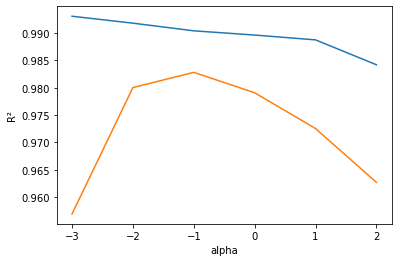

In [101]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R²')
plt.show()

파랑색: 훈련세트 그래프, 주황색: 테스트세트 그래프 이다. 이 그래프의 왼쪽을 보면 훈련 세트와 테스트 세트의 점수 차이가 아주 크다. 훈련 세트에는 잘 맞고 테스트 세트에는 형편없는 과대적합의 전형적인 모습이다. 반대로 오른쪽 편은 훈련 세트와 테스트 세트의 점수가 모두 낮아지는 과소적합으로 가는 모습을 보인다.

적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 -1, 즉 10^-1 = 0.1 이다. alpha값을 0.1로 하여 최종 모델을 훈련하겠다.

In [103]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


이 모델은 훈련 세트와 테스트 세트의 점수가 비슷하게 모두 높고 과대적합과 과소적합 사이에서 균형을 맞추고 있다. 이번에는 라쏘 모델을 훈련해 보자.

### 라쏘 회귀

라쏘 모델을 훈련하는 것은 릿지와 매우 비슷하다. Ridge 클래스를 Lasso 클래스로 바꾸는 것이 전부이다.

In [104]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


라쏘도 과대적합을 잘 억제한 결과를 보여준다. 테스트 세트의 점수도 확인해보자.

In [105]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


테스트 세트의 점수도 릿지만큼 아주 좋다. 라쏘 모델도 alpha 매개변수로 규제의 강도를 조절 할 수 있다. 여기에서도 앞에서와 같이 alpha 값을 바꾸어 가며 훈련 세트와 테스트 세트에 대한 점수를 계산하겠다.

In [106]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    #라쏘 모델을 만든다.
    lasso = Lasso(alpha=alpha, max_iter=10000)
    #라쏘 모델을 훈려한다
    lasso.fit(train_scaled, train_target)
    #훈련점수와 테스트 점수를 저장한다.
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


- 경고(Warning)가 뜬다. 정상인가?

라쏘 모델을 훈련할 때 CovergenceWarning 이란 경고가 발생할 수 있다. 사이킷런의 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복 획수가 부족할 때 이런 경고가 발생한다. 이 반복 횟수를 충분히 늘리기 위해 max_iter 매개변수의 값을 10000으로 지정했다.필요하면 더 늘릴 수 있지만 이 문제에서는 큰 영향을 끼치지 않는다.

그 다음 train_score 와 test_score 리스트를 사용해 그래프를 그린다. 이 그래프도 x축은 로그 스케일로 바꿔 그린다.

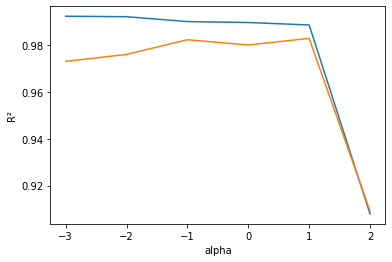

In [107]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R²')
plt.show()

이 그래프도 왼쪽은 과대적합을 보여주고 있고, 오른쪽으로 갈 수록 훈련 세트와 테스트 세트의 점수가 좁혀지고 있다. 가장 오른쪽은 아주 크게 점수가 떨어진다. 이 지점은 분명 과소적합되는 모델일 것이다. 라쏘 모델에서 최적은 alpha값은 1, 즉 10^1=10이다. 이 값으로 다시 모델을 훈련해보자.

In [108]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


네, 모델이 잘 훈련된 것 같다. 특성을 많이 사용했지만, 릿지와 마찬가지로 라쏘 모델이 과대적합을 잘 억제하고 테스트 세트의 성능을 크게 높였다. 앞에서 라쏘 모델은 계수 값을 아예 0으로 만들 수 있다고 했던 것을 기억하나요? 라쏘 모델의 계수는 coef_속성에 저장되어 있다. 이중에 0인것을 헤아려 보겠다.

In [109]:
print(np.sum(lasso.coef_ ==0))

40


- np.sum()함수는 배열을 모두 더한 값을 반환한다. 넘파이 배열에 비교 연산자를 사용했을 때 각 원소는 True 또는 False가 된다. np.sum()함수는 True를 1로, False를 0으로 인식하여 덧셈을 할 수 있기 때문에 마치 비교 연산자에 맞는 원소 개수를 헤아리는 효과를 낸다.

정말 많은 계수가 0이 되었다. 55개의 특성을 모델에 주입했지만 라쏘 모델이 사용한 특성은 15개박에 되지 않는다. 이런 특징 때문에 라쏘 모델을 유용한 특성을 골라내는 용도로도 사용할 수 있다.

이제 규제를 적용한 선형 모델을 사용해 농어의 무게를 아주 잘 예측할 수 있게 되었다.

### 모델의 과대적합을 억제하기 - 문제해결 과정

처음부터 봐보자. 선형 회귀 알고리즘을 사용해 농어의 무게를 예측하는 모델을 훈련시켰지만 훈련 세트에 과속적합되는 문제가 발생했다. 이를 위해 농어의 길이뿐만 아니라 높이와 두께도 사용하여 다중 회귀 모델을 훈련 시켰다.

또한 다항 특성을 많이 추가하여 훈련 세트에서 거의 완벽에 가까운 점수를 얻는 모델을 훈련했다. 특성을 많이 추가하면 선형 회귀는 매우 강력한 성능을 낸다. 하지만 특성이 너무 많으면 선형 회귀 모델을 제약하기 위한 도구가 필요하다.

이를 위해 릿지 회귀와 라쏘 회귀에 대해 알아보았다. 사이킷런을 사용해 다중 회귀 모델과 릿지, 라쏘 모델을 훈련 시켰다. 또 릿지와 라쏘 모델의 규제 양을 조절하기 위한 최적의 alpha값을 찾는 방법을 알아보았다.

> 전체 소스 코드 
    - https://bit.ly//hg-03-3 에 접속하면 코랩에서 이 절의 코드를 바로 열어 볼 수 있다.

## 데이터 준비

In [112]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [113]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [114]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## 사이킷런의 변환기


In [143]:
from sklearn.preprocessing import PolynomialFeatures

In [117]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [118]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [119]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

In [120]:
print(train_poly.shape)

(42, 9)


In [121]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [122]:
test_poly = poly.transform(test_input)

## 다중 회귀 모델 훈련하기

In [142]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991096


In [124]:
print(lr.score(test_poly, test_target))

0.9714559911594132


In [125]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [126]:
print(train_poly.shape)

(42, 55)


In [127]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991096


In [128]:
print(lr.score(test_poly, test_target))

-144.40579242335605


## 규제

In [129]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지

In [130]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [131]:
print(ridge.score(test_scaled, test_target))

0.9790693977615397


In [132]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [133]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

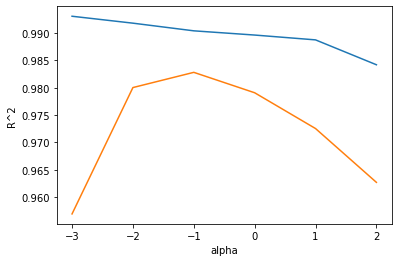

In [134]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [135]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


In [136]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [137]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [138]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


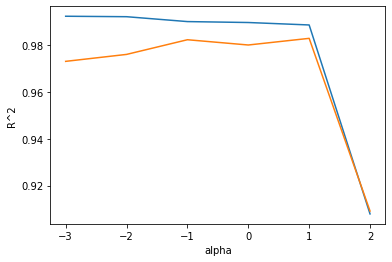

In [139]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [140]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [141]:
print(np.sum(lasso.coef_ == 0))

40


- 출처: 혼자공부하는 머신러닝 + 딥러닝